# Comp 551 Assignment 1
Fynn Schmitt-Ulms, Joon Hwan Hong, and Daniel Korsunsky

Instructions:
This code was written and run on google colab. 
It depends on the version of numpy, pandas, matplotlib, and seaborn that google colab uses. 
To run it the two datasets first need to be uploaded to the "content/" folder of colab which is the default folder when using the file explorer on colab.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
np.random.seed(551) # set random seed.

Make sure data is in the content/ folder

# Import Breast Cancer Data

In [ ]:
df_bc = pd.read_csv('./breast_cancer_wisconsin.csv', index_col='id')

In [ ]:
print(df_bc.shape)
df_bc.head()

(699, 10)


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Find quantities of missing values for each feature

In [ ]:
(df_bc == '?').sum(axis=0)

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
print('Removing', df_bc[df_bc.eq('?').any(1)].shape[0], 'rows!')

df_bc = df_bc[~df_bc.eq('?').any(1)]
df_bc = df_bc.astype('int64')

Removing 16 rows!


In [ ]:
X_bc = df_bc.drop(columns='Class')
Y_bc = df_bc['Class']

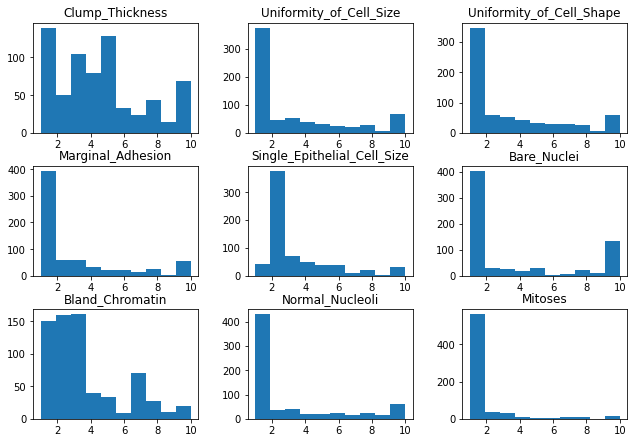

In [ ]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=3)

left  = 0.125  # the left side of the subplots of the figure
right = 1.5    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 1.5      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)

for row in range(3):
    for col in range(3):
        ind = 3 * row + col
        _ = f1_axes[row][col].hist(X_bc.iloc[:, ind].to_numpy())
        _ = f1_axes[row][col].set_title(X_bc.columns[ind])

plt.savefig("Breast Cancer Feature Distributions.png")

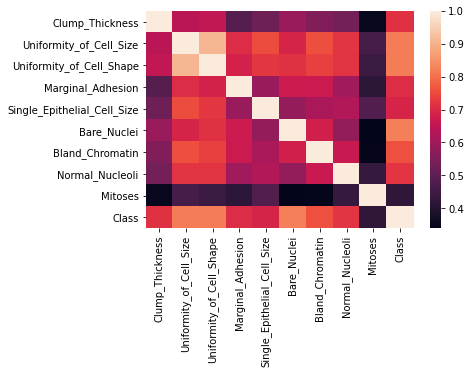

In [ ]:
bc_heat = seaborn.heatmap(df_bc.corr())
plt.savefig("Breast Cancer Feature-Class Correlation.png")

# Import Hepatitis Data

In [ ]:
df_h = pd.read_csv('./hepatitis.csv')

In [ ]:
print(df_h.shape)
df_h.head()

(155, 20)


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Find quantities of missing data for each feature

In [ ]:
print(df_h[df_h.eq('?').any(1)].shape[0], "/", df_h.shape[0], "rows missing at least one feature.")
(df_h == '?').sum(axis=0)

75 / 155 rows missing at least one feature.


Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

#Clean Data here
In the process of cleaning data, (due to the high number of missing values) instead of removing rows with missing values, the missing values will be filled in with either the mean or mode of the feature (depending on whether the data is continuous or categorical). 

In [ ]:
categorical_features = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 
                        'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']
continuous_features = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']

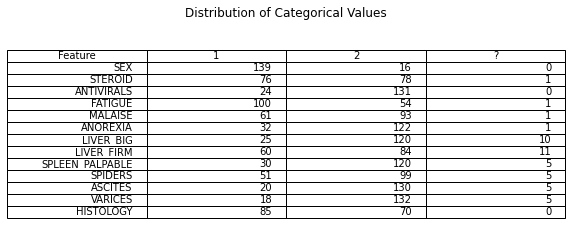

In [ ]:
table_header = ['Feature', '1', '2', '?']
table_data = []
for f in categorical_features:
    f_d = df_h[f].value_counts()
    if type(f_d.index) == pd.Int64Index:
        table_data.append([f, f_d.loc[1], f_d.loc[2], 0])
    else:
        table_data.append([f, f_d.loc['1'], f_d.loc['2'], f_d.loc['?']])

fig = plt.figure(figsize=(10,0.5))

t = plt.table(cellText=table_data, colLabels=table_header, loc='bottom')

plt.xticks([])
plt.title('Distribution of Categorical Values')

plt.axis('off')
plt.grid('off')

plt.savefig("Hepatitis Categorical Feature Distributions.png")

In [ ]:
# Replace missing value with the mode value for that column
# Change datatype of all values to float
for f in categorical_features:
    mode = df_h[f].replace('?', pd.NA).mode()
    df_h[f] = df_h[f].replace('?', mode.values[0])
    df_h[f] = df_h[f].astype('float64')
    df_h[f] = (df_h[f] - np.mean(df_h[f].values)) / np.std(df_h[f].values)

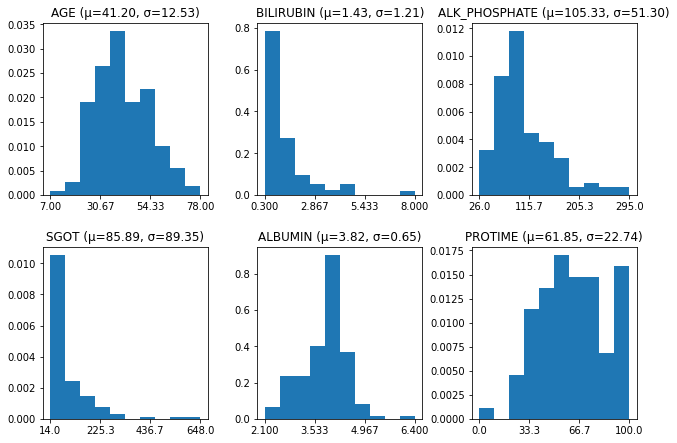

In [ ]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2)

left  = 0.125  # the left side of the subplots of the figure
right = 1.5    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 1.5      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=right, top=top, wspace=wspace, hspace=hspace)

for row in range(2):
    for col in range(3):
        ind = 3* row + col
        g_data = df_h[continuous_features].iloc[:, ind].replace('?', pd.NA).dropna().to_numpy().astype(np.float)
        _ = f1_axes[row][col].hist(g_data, density=True)
        f1_axes[row][col].set_title(continuous_features[ind] + ' (μ=%.2f, σ=%.2f)' % (np.mean(g_data), np.std(g_data)) )
        x_ticks = np.linspace(np.min(g_data), np.max(g_data), num=4)
        f1_axes[row][col].set_xticks(x_ticks)

plt.savefig("Hepatitis Continuous Feature Distributions.png")

In [ ]:
# Replace missing values with the mean value for that column
# Change datatype of all values to float
for f in continuous_features:
    mean = df_h[f].replace('?', pd.NA).dropna().astype('float64').mean()
    df_h[f] = df_h[f].replace('?', mean)
    df_h[f] = df_h[f].astype('float64')
    df_h[f] = (df_h[f] - mean) / np.std(df_h[f].values)

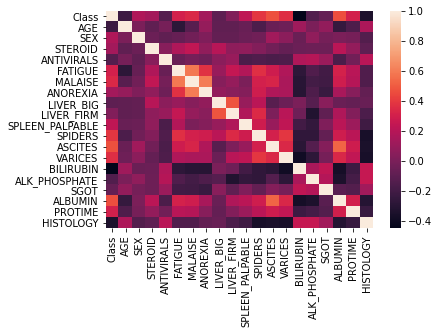

In [ ]:
seaborn.heatmap(df_h.corr())
plt.savefig("Hepatitus Feature-Class Correlation.png")

In [ ]:
X_h = df_h.drop(columns='Class')
Y_h = df_h['Class']

## Evaluate accuracy function

In [ ]:
# ACCURACY EVALUATION 
def evaluate_acc(true_labels, target_labels):
    return np.mean(true_labels == target_labels)

# KNN Section (Justin)

## KNN Distance Functions

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski = lambda x1, x2: np.sum((x1 - x2)**4, axis=-1)**(1/float(4)) # minkowski of 4

## KNN Class 

In [ ]:
class KNN:
    def __init__(self, K=1, dist_fn=euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return np.argmax(y_prob, axis=1)

# Decision Tree Section (Daniel)

## Cost Functions

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels)
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

## Decision Tree Class Definition

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent
            self.num_classes = parent.num_classes           #copies the num classes from the parent
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue
            #compute the left and right cost based on the current split
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=3, cost_fn=cost_misclassification, num_classes=None, min_leaf_instances=1):
        self.max_depth = max_depth  # maximum dept for termination
        self.root = None  # stores the root of the decision tree
        self.cost_fn = cost_fn  # stores the cost function of the decision tree
        self.num_classes = num_classes  # stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  # minimum number of instances in a leaf for termination

    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return np.argmax(class_probs, axis=1)

# Section 3: Training and Testing


Data defined above: \\
X_bc, Y_bc for Breast Cancer Data \\
X_h, Y_h for Hepatitis Data

In [ ]:
print(X_bc.shape)
print(X_h.shape)

(683, 9)
(155, 19)


In [ ]:
def get_random_indices(n, n_test):
    ind_shuffled = np.random.permutation(n)
    return ind_shuffled[:-n_test], ind_shuffled[-n_test:]

BC_TEST_SET_SIZE = 100
H_TEST_SET_SIZE = 40

# Seperate 100 elements for test set (out of 683)
ind_bc_train_val, ind_bc_test = get_random_indices(X_bc.shape[0], BC_TEST_SET_SIZE)

# Seperate 40 elements for test set (out of 155)
ind_h_train_val, ind_h_test = get_random_indices(X_h.shape[0], H_TEST_SET_SIZE)

In [ ]:
def run_k_fold_hyperparameter_search(X, Y, model, ind_train_val, k_fold, param1, param2):
    # Assume k_fold >= 3
    # parameters should be a list of lists
    ind_folds = np.array_split(ind_train_val, k_fold)

    avg_acc = np.zeros((len(param1), len(param2)))

    for i, p1 in enumerate(param1):
        for j, p2 in enumerate(param2):
            m = model(p1, p2)
            val_accs = np.zeros(k_fold)
            for val_ind in range(k_fold):

                first = 0 if val_ind != 0 else 1
                ind_train = ind_folds[first]
                for k in range(first+1, k_fold):
                    if k != val_ind:
                        ind_train = np.concatenate([ind_train, ind_folds[k]])
                
                m.fit(X.values[ind_train, :], Y.values[ind_train])
                pred = m.predict(X.values[ind_folds[val_ind]])
                # print(pred)
                # break

                val_accs[val_ind] = evaluate_acc(Y.values[ind_folds[val_ind]], pred)
            
            # Average Acc Accuracy k-folds
            avg_acc[i, j] = np.mean(val_accs)
            # break
        # break
    return np.amax(avg_acc), avg_acc

In [ ]:
def plot_hyperparameter_search(acc_grid, param1, param2_names, title, param1_title, param2_title):
    plt.plot(param1, acc_grid)
    plt.legend(param2_names, title=param2_title)
    plt.title(title, )
    plt.xlabel(param1_title)
    plt.ylabel("Average K-fold Val Accuracy")

In [ ]:
def get_best_model(acc_grid, X, Y, model, ind_train_val, ind_test, param1, param2):
    ind = np.argmax(acc_grid)
    ind_param1, ind_param2 = (ind // acc_grid.shape[1]), (ind % acc_grid.shape[1])
    m = model(param1[ind_param1], param2[ind_param2])
    m.fit(X.values[ind_train_val, :], Y.values[ind_train_val])
    pred = m.predict(X.values[ind_test])
    return evaluate_acc(Y.values[ind_test], pred), m

In [ ]:
# KNN hyperparameters
knn_dist_funcs = [euclidean, manhattan, minkowski]
K_vals = np.arange(1, 11, 1)

# Decision Tree hyperparameters
dt_cost_funcs = [cost_misclassification, cost_entropy, cost_gini_index]
max_depth_vals = np.arange(1, 11)

# K-Fold Cross Validation Value
k_folds = 5

Best K-fold Avg Validation Accuracy: 0.9725464190981432
Test Set Accuracy: 0.98


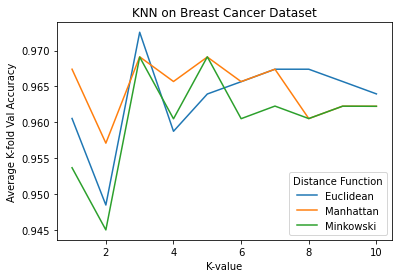

In [ ]:
# KNN BC data k-fold
max_acc, acc_grid = run_k_fold_hyperparameter_search(X_bc, Y_bc, KNN, ind_bc_train_val, k_folds, K_vals, knn_dist_funcs)
print("Best K-fold Avg Validation Accuracy:", max_acc)
plot_hyperparameter_search(acc_grid, K_vals, ["Euclidean", "Manhattan", "Minkowski"], "KNN on Breast Cancer Dataset", "K-value", "Distance Function")
test_acc, _ = get_best_model(acc_grid, X_bc, Y_bc, KNN, ind_bc_train_val, ind_bc_test, K_vals, knn_dist_funcs)
print("Test Set Accuracy:", test_acc)
plt.savefig("KNN on Breast Cancer Dataset.png")

Best K-fold Avg Validation Accuracy: 0.957147067491895
Test Set Accuracy: 0.99


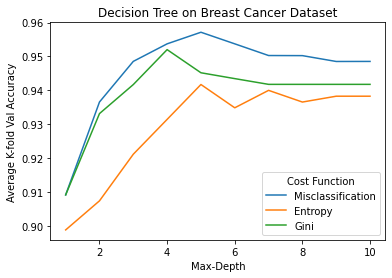

In [ ]:
# DT BC data k-fold
max_acc, acc_grid = run_k_fold_hyperparameter_search(X_bc, Y_bc, DecisionTree, ind_bc_train_val, 5, max_depth_vals, dt_cost_funcs)
print("Best K-fold Avg Validation Accuracy:", max_acc)
plot_hyperparameter_search(acc_grid, max_depth_vals, ["Misclassification", "Entropy", "Gini"], "Decision Tree on Breast Cancer Dataset", "Max-Depth", "Cost Function")
test_acc, _ = get_best_model(acc_grid, X_bc, Y_bc, DecisionTree, ind_bc_train_val, ind_bc_test, max_depth_vals, dt_cost_funcs)
print("Test Set Accuracy:", test_acc)
plt.savefig("Decision Tree on Breast Cancer Dataset.png")

Best K-fold Avg Validation Accuracy: 0.8695652173913043
Test Set Accuracy: 0.775


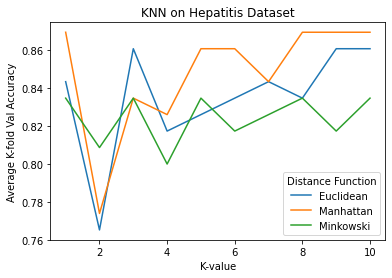

In [ ]:
# KNN H data k-fold
max_acc, acc_grid = run_k_fold_hyperparameter_search(X_h, Y_h, KNN, ind_h_train_val, 5, K_vals, knn_dist_funcs)
print("Best K-fold Avg Validation Accuracy:", max_acc)
plot_hyperparameter_search(acc_grid, K_vals, ["Euclidean", "Manhattan", "Minkowski"], "KNN on Hepatitis Dataset", "K-value", "Distance Function")
test_acc, _ = get_best_model(acc_grid, X_h, Y_h, KNN, ind_h_train_val, ind_h_test, K_vals, knn_dist_funcs)
print("Test Set Accuracy:", test_acc)
plt.savefig("KNN on Hepatitis Dataset.png")

0.8434782608695652
Test Set Accuracy: 0.8


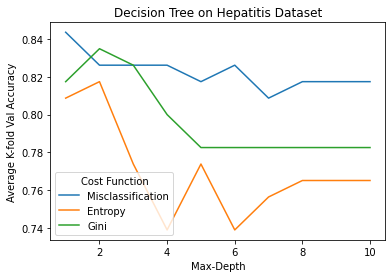

In [ ]:
# DT H data k-fold
max_acc, acc_grid = run_k_fold_hyperparameter_search(X_h, Y_h, DecisionTree, ind_h_train_val, 5, max_depth_vals, dt_cost_funcs)
print(max_acc)
plot_hyperparameter_search(acc_grid, max_depth_vals, ["Misclassification", "Entropy", "Gini"], "Decision Tree on Hepatitis Dataset", "Max-Depth", "Cost Function")
test_acc, _ = get_best_model(acc_grid, X_h, Y_h, DecisionTree, ind_h_train_val, ind_h_test, max_depth_vals, dt_cost_funcs)
print("Test Set Accuracy:", test_acc)
plt.savefig("Decision Tree on Hepatitis Dataset.png")

# Decision Boundaries


In [ ]:
def plot_decision_boundary(model, X, Y, ind_train_val, ind_test, name_feature1, name_feature2):
    x_1 = X[name_feature1].values
    x_2 = X[name_feature2].values

    x_1_min, x_1_max = np.min(x_1) - 1, np.max(x_1) + 1
    x_2_min, x_2_max = np.min(x_2) - 1, np.max(x_2) + 1

    # step size
    h = 0.1

    x_1_vals, x_2_vals = np.meshgrid(np.arange(x_1_min, x_1_max, h), np.arange(x_2_min, x_2_max, h))

    model.fit(X[[name_feature1, name_feature2]].values[ind_train_val, :], Y.values[ind_train_val])
    z = model.predict(np.c_[x_1_vals.ravel(), x_2_vals.ravel()])

    # print(np.unique(z))

    z = z.reshape(x_1_vals.shape)
    cs =plt.contourf(x_1_vals, x_2_vals, z, levels=1)
    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]

    # plt.legend(proxy, ["class=1", "class=2"])
    plt.xlabel(name_feature1)
    plt.ylabel(name_feature2)
    # plt.axis('off')

    # Plot also the training points
    s1 = plt.scatter(X[name_feature1].values[ind_train_val][Y.values[ind_train_val] == 1], X[name_feature2].values[ind_train_val][Y.values[ind_train_val] == 1], marker='x', c='white')
    s2 = plt.scatter(X[name_feature1].values[ind_train_val][Y.values[ind_train_val] == 2], X[name_feature2].values[ind_train_val][Y.values[ind_train_val] == 2], marker='+', c='red')

    plt.legend(proxy + [s1, s2], ["class=1", "class=2"] *2)
    # plt.scatter(X[name_feature1].values[ind_train_val], X[name_feature2].values[ind_train_val], cmap="Pastel1")

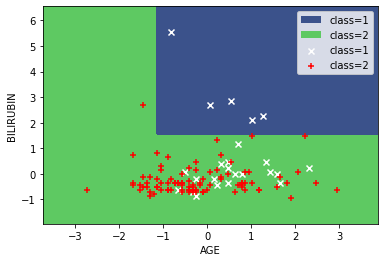

In [ ]:
plot_decision_boundary(DecisionTree(5, cost_fn=cost_misclassification), X_h, Y_h, ind_h_train_val, ind_h_test, "AGE", "BILIRUBIN")

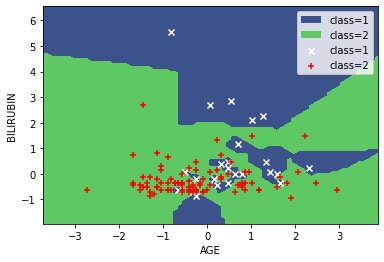

In [ ]:
plot_decision_boundary(KNN(1, dist_fn=euclidean), X_h, Y_h, ind_h_train_val, ind_h_test, "AGE", "BILIRUBIN")